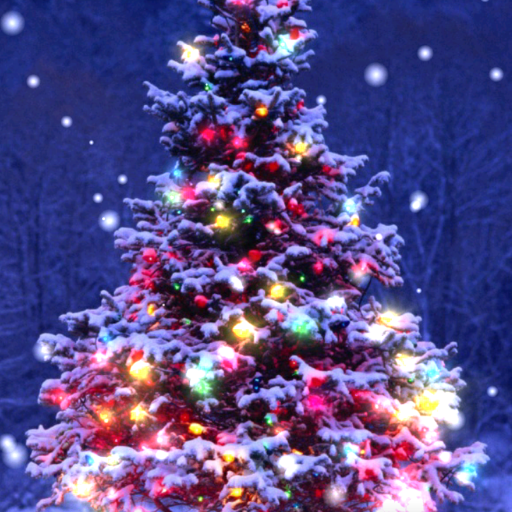

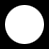

In [588]:
#Выполнил: Айрат Татлыбаев

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
in_image = cv2.imread("./image_3.png")
in_image_filter = cv2.imread("./circle.bmp")

image        = in_image / 255
image_filter = in_image_filter / 255

cv2_imshow(in_image)
cv2_imshow(in_image_filter)

In [589]:
b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0
# RGB - Blue
#cv2_imshow(b)

In [590]:
g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0
# RGB - Green
#cv2_imshow(g)

In [591]:
r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0
# RGB - Red
#cv2_imshow(r)

In [592]:
#matrix_zero = np.zeros((304,400,3))
#переменные для расчета размеров и границ матриц
h_image_add,w_image_add,c_image_add = matrix_zero_r.shape
h_image,w_image,c_image = image.shape
h_image_filter,_,_ = image_filter.shape

num_zero_field = (h_image_filter-1) // 2

#создаем расширенные нулевые матрицы для каждого канала (красный, зеленый, синий)
matrix_zero_r = np.zeros((h_image + num_zero_field * 2, w_image + num_zero_field * 2, 3))
matrix_zero_g = np.zeros((h_image + num_zero_field * 2, w_image + num_zero_field * 2, 3))
matrix_zero_b = np.zeros((h_image + num_zero_field * 2, w_image + num_zero_field * 2, 3))
print(matrix_zero_r.shape)

(560, 560, 3)


In [593]:
#Создаем новые матрицы для каждого канала  
matrix_zero_r[num_zero_field:h_image + num_zero_field, num_zero_field:w_image + num_zero_field, :] = r 
matrix_zero_g[num_zero_field:h_image + num_zero_field, num_zero_field:w_image + num_zero_field, :] = g 
matrix_zero_b[num_zero_field:h_image + num_zero_field, num_zero_field:w_image + num_zero_field, :] = b 


In [594]:
#Сумма значений ядра свертки
sum_image_filter = np.sum(image_filter[:,:,0])
print(sum_image_filter)

1193.2666666666667


In [595]:
#Создаём матрицу для итоговой картинки 
out_image = np.zeros((h_image,w_image,3))

#Перебор координат расширенной матрицы 
for line in range(num_zero_field,h_image + num_zero_field):
    for col in range(num_zero_field,w_image + num_zero_field):

    #матрицы результата перемножения ядра свертки на кусочек картинки для каждого канала
    matrix_dot_blue  = image_filter[:,:,0] * matrix_zero_b[line - num_zero_field:line + num_zero_field + 1, col - num_zero_field:col + num_zero_field + 1, 0]
    matrix_dot_green = image_filter[:,:,0] * matrix_zero_g[line - num_zero_field:line + num_zero_field + 1, col - num_zero_field:col + num_zero_field + 1, 1]
    matrix_dot_red   = image_filter[:,:,0] * matrix_zero_r[line - num_zero_field:line + num_zero_field + 1, col - num_zero_field:col + num_zero_field + 1, 2]

    #Контролируем яркость нового пикселя делением суммы значений ядра
    result_blue  = np.sum(matrix_dot_blue) / sum_image_filter
    result_green = np.sum(matrix_dot_green)/ sum_image_filter
    result_red   = np.sum(matrix_dot_red)  / sum_image_filter

    #Итоговый результат значения пикселя    
    out_image[line - num_zero_field, col - num_zero_field, 0] = result_blue
    out_image[line - num_zero_field, col - num_zero_field, 1] = result_green
    out_image[line - num_zero_field, col - num_zero_field, 2] = result_red

#Обратное шкалирование 
out_image = out_image * 255 

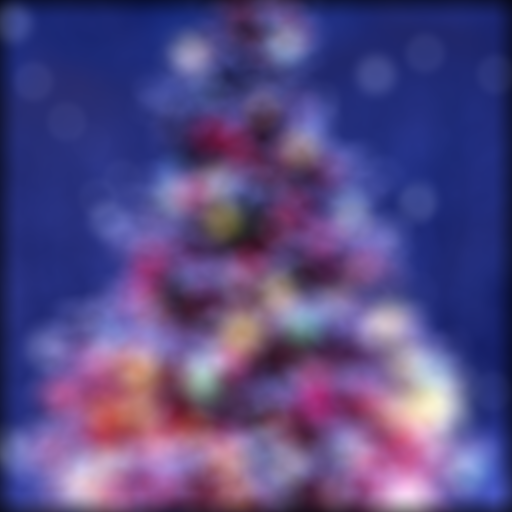

In [596]:
cv2_imshow(out_image)

In [597]:
#Сохраняем полученную картинку
cv2.imwrite('./out_image.jpeg', out_image)

True